In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import sys
import os
sys.path.append(os.path.abspath("../"))

from sklearn.manifold import MDS
from time import time
from mpl_toolkits.mplot3d import Axes3D
from learn import CompassModel

names = [
    "seville-cr-32-20170321",
    "seville-cr-32-20170601"
]

# Load training data
x, y = CompassModel.load_dataset(names[:-1], pol=True, y_shape=(-1, 1))
x = x.reshape((x.shape[0], -1))
i = np.all(~np.isnan(x), axis=1)
x, y = x[i], y[i]
print "Train:", x.shape, y.shape

Using TensorFlow backend.


Loading 'seville-cr-32-20170321.npz' ...
Train: (8640, 12416) (8640, 1)


# Multidimensional Scaling (MDS)

**Multidimensional scaling (MDS)** is a means of visualizing the level of similarity of individual cases of a dataset.
It refers to a set of related ordination techniques used in information visualization, in particular to display the information contained in a distance matrix.
It is a form of non-linear dimensionality reduction.
An MDS algorithm aims to place each object in N-dimensional space such that the between-object distances are preserved as well as possible.
Each object is then assigned coordinates in each of the N dimensions.
The number of dimensions of an MDS plot N can exceed 2 and is specified a priori.
Choosing N=2 optimizes the object locations for a two-dimensional scatterplot.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Multidimensional_scaling)

**Multidimensional scaling (MDS)** can be considered to be an alternative to factor analysis (see [Factor Analysis](http://www.statsoft.com/Textbook/Principal-Components-Factor-Analysis)).
In general, the goal of the analysis is to detect meaningful underlying dimensions that allow the researcher to explain observed similarities or dissimilarities (distances) between the investigated objects.
In factor analysis, the similarities between objects (e.g., variables) are expressed in the correlation matrix.
With MDS, you can analyze any kind of similarity or dissimilarity matrix, in addition to correlation matrices.

## MDS and Factor Analysis

Even though there are similarities in the type of research questions to which these two procedures can be applied, MDS and factor analysis are fundamentally different methods.
Factor analysis requires that the underlying data are distributed as multivariate normal, and that the relationships are linear.
MDS imposes no such restrictions.
As long as the rank-ordering of distances (or similarities) in the matrix is meaningful, MDS can be used.
In terms of resultant differences, factor analysis tends to extract more factors (dimensions) than MDS; as a result, MDS often yields more readily, interpretable solutions.
Most importantly, however, MDS can be applied to any kind of distances or similarities, while factor analysis requires us to first compute a correlation matrix.
MDS can be based on subjects' direct assessment of similarities between stimuli, while factor analysis requires subjects to rate those stimuli on some list of attributes (for which the factor analysis is performed).

In summary, MDS methods are applicable to a wide variety of research designs because distance measures can be obtained in any number of ways (for different examples, refer to the references provided at the beginning of this section).

Source: [Statsoft](http://www.statsoft.com/Textbook/Multidimensional-Scaling)

In [2]:
mds = MDS(n_components=3, n_jobs=3)
print "Reducing dimensions..."
t0 = time()
x_mds = mds.fit_transform(x)
t1 = time()
print "New train:", x_mds.shape, "in", t1 - t0, "sec"

Reducing dimensions...
New train: (8640, 3) in 2479.03948808


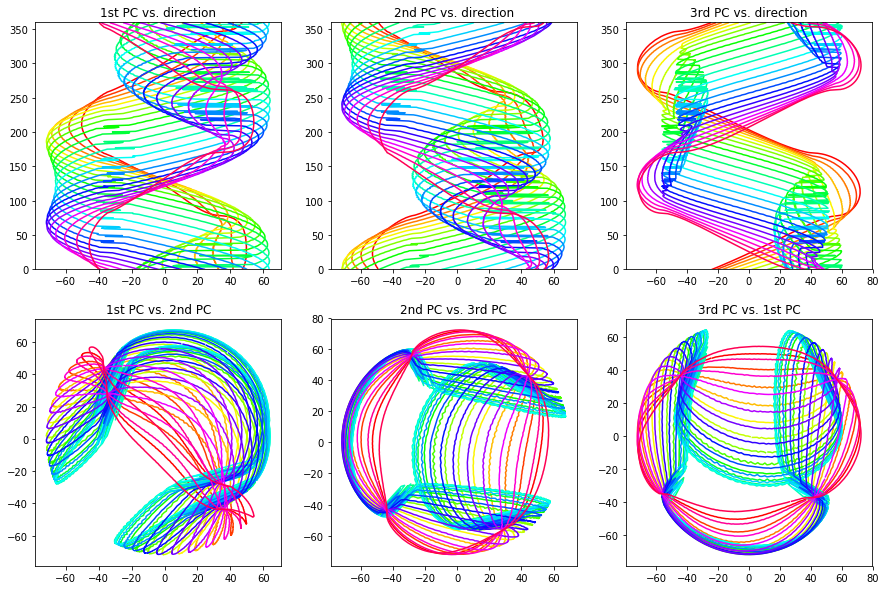

In [3]:
N = x_mds.shape[0] / 360
plt.figure(2, figsize=(15, 10))
plt.subplot(231)
for i in xrange(N):
    plt.plot(x_mds[(i*360):((i+1)*360), 0], np.rad2deg(y[(i*360):((i+1)*360)]), color=cmx.hsv(i/float(N)))
plt.ylim([0, 360])
plt.title("1st PC vs. direction")

plt.subplot(232)
for i in xrange(N):
    plt.plot(x_mds[(i*360):((i+1)*360), 1], np.rad2deg(y[(i*360):((i+1)*360)]), color=cmx.hsv(i/float(N)))
plt.ylim([0, 360])
plt.title("2nd PC vs. direction")

plt.subplot(233)
for i in xrange(N):
    plt.plot(x_mds[(i*360):((i+1)*360), 2], np.rad2deg(y[(i*360):((i+1)*360)]), color=cmx.hsv(i/float(N)))
plt.ylim([0, 360])
plt.title("3rd PC vs. direction")

plt.subplot(234)
for i in xrange(N):
    plt.plot(x_mds[(i*360):((i+1)*360), 0], x_mds[(i*360):((i+1)*360), 1], color=cmx.hsv(i/float(N)))
plt.title("1st PC vs. 2nd PC")

plt.subplot(235)
for i in xrange(N):
    plt.plot(x_mds[(i*360):((i+1)*360), 1], x_mds[(i*360):((i+1)*360), 2], color=cmx.hsv(i/float(N)))
plt.title("2nd PC vs. 3rd PC")

plt.subplot(236)
for i in xrange(N):
    plt.plot(x_mds[(i*360):((i+1)*360), 2], x_mds[(i*360):((i+1)*360), 0], color=cmx.hsv(i/float(N)))
plt.title("3rd PC vs. 1st PC")

plt.show()

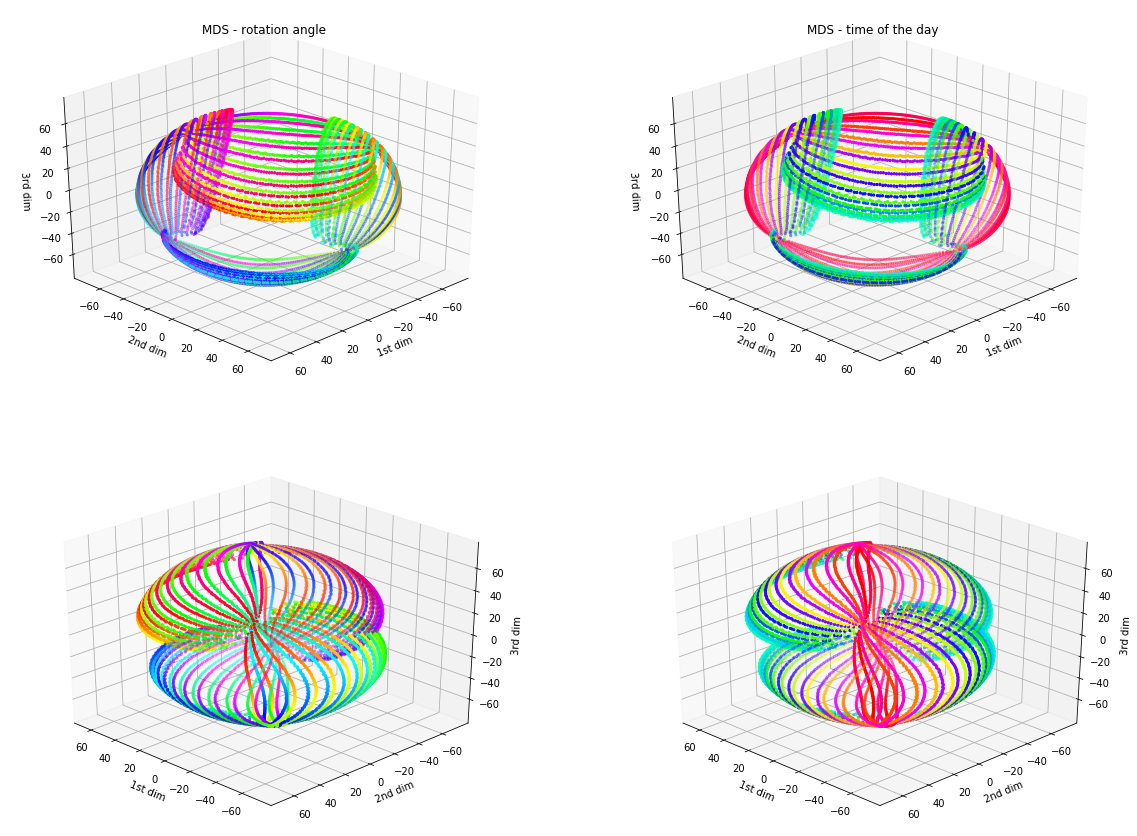

In [4]:
plt.figure(2, figsize=(20, 15))
ax = plt.subplot(221, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_mds[(i*360):((i+1)*360), 0],
        x_mds[(i*360):((i+1)*360), 1],
        x_mds[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st dim")
ax.set_ylabel("2nd dim")
ax.set_zlabel("3rd dim")
ax.view_init(30, 45)
plt.title("MDS - rotation angle")

ax = plt.subplot(222, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_mds[(i*360):((i+1)*360), 0],
        x_mds[(i*360):((i+1)*360), 1],
        x_mds[(i*360):((i+1)*360), 2],
        marker='.', c=cmx.hsv(i/float(N)), cmap='hsv')
ax.set_xlabel("1st dim")
ax.set_ylabel("2nd dim")
ax.set_zlabel("3rd dim")
ax.view_init(30, 45)
plt.title("MDS - time of the day")

ax = plt.subplot(223, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_mds[(i*360):((i+1)*360), 0],
        x_mds[(i*360):((i+1)*360), 1],
        x_mds[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st dim")
ax.set_ylabel("2nd dim")
ax.set_zlabel("3rd dim")
ax.view_init(30, 135)

ax = plt.subplot(224, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_mds[(i*360):((i+1)*360), 0],
        x_mds[(i*360):((i+1)*360), 1],
        x_mds[(i*360):((i+1)*360), 2],
        marker='.', c=cmx.hsv(i/float(N)), cmap='hsv')
ax.set_xlabel("1st dim")
ax.set_ylabel("2nd dim")
ax.set_zlabel("3rd dim")
ax.view_init(30, 135)

plt.show()

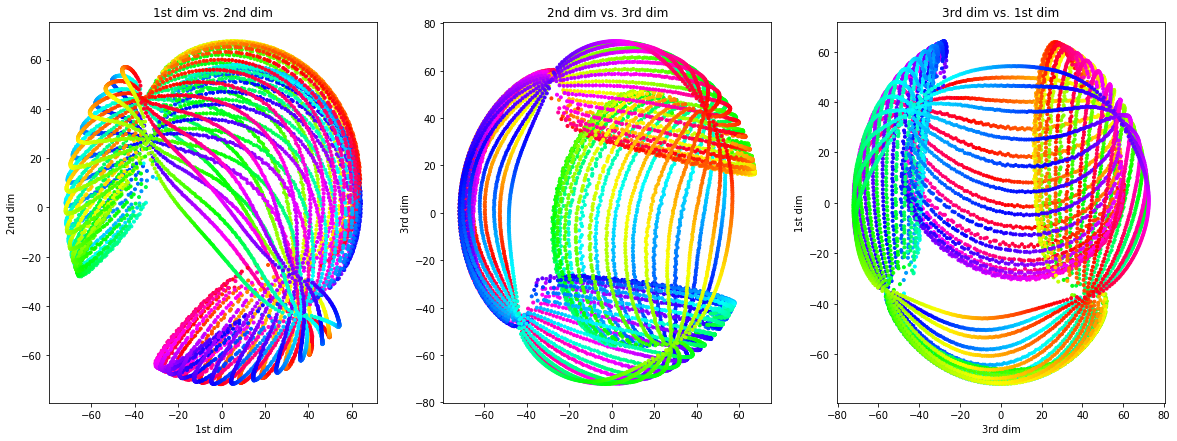

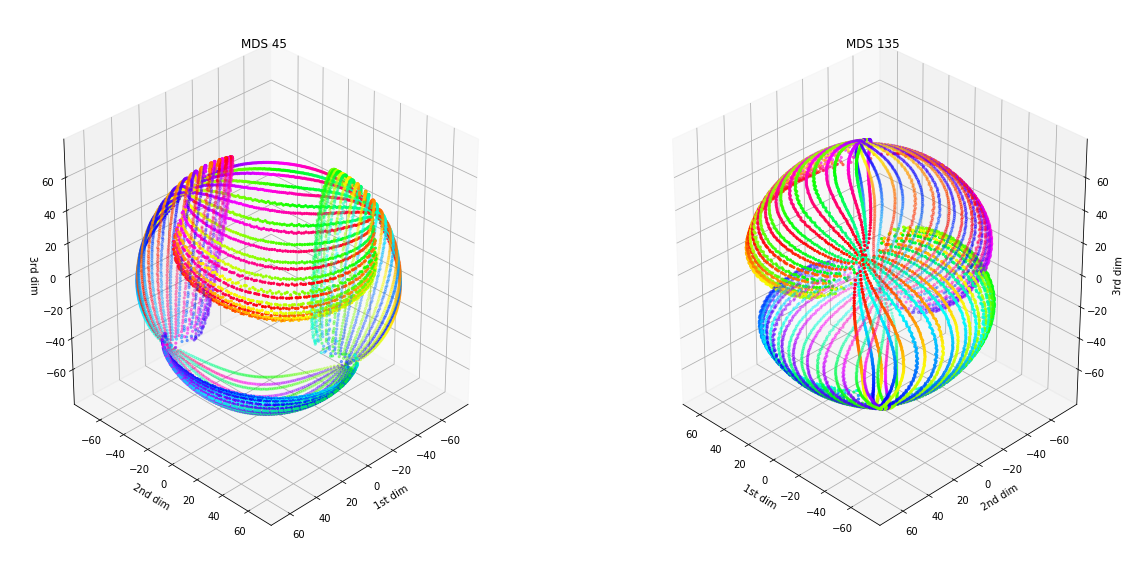

In [5]:
N = x_mds.shape[0] / 360
plt.figure(3, figsize=(20, 7))
plt.subplot(131)
for i in xrange(N):
    plt.scatter(x_mds[(i*360):((i+1)*360), 0], x_mds[(i*360):((i+1)*360), 1],
                marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("1st dim")
plt.ylabel("2nd dim")
plt.title("1st dim vs. 2nd dim")

plt.subplot(132)
for i in xrange(N):
    plt.scatter(x_mds[(i*360):((i+1)*360), 1], x_mds[(i*360):((i+1)*360), 2],
                marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("2nd dim")
plt.ylabel("3rd dim")
plt.title("2nd dim vs. 3rd dim")

plt.subplot(133)
for i in xrange(N):
    plt.scatter(x_mds[(i*360):((i+1)*360), 2], x_mds[(i*360):((i+1)*360), 0],
                marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
plt.xlabel("3rd dim")
plt.ylabel("1st dim")
plt.title("3rd dim vs. 1st dim")

plt.figure(4, figsize=(20, 10))
ax = plt.subplot(121, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_mds[(i*360):((i+1)*360), 0],
        x_mds[(i*360):((i+1)*360), 1],
        x_mds[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st dim")
ax.set_ylabel("2nd dim")
ax.set_zlabel("3rd dim")
ax.view_init(30, 45)
plt.title("MDS 45")

ax = plt.subplot(122, projection='3d')
for i in xrange(N):
    ax.scatter3D(
        x_mds[(i*360):((i+1)*360), 0],
        x_mds[(i*360):((i+1)*360), 1],
        x_mds[(i*360):((i+1)*360), 2],
        marker='.', c=y[(i*360):((i+1)*360)], cmap='hsv')
ax.set_xlabel("1st dim")
ax.set_ylabel("2nd dim")
ax.set_zlabel("3rd dim")
ax.view_init(30, 135)
plt.title("MDS 135")

plt.show()